# Observables en Física de Partículas


In [2]:
import time
print(' Last version ', time.asctime() )

 Last version  Thu Oct 17 13:13:22 2024


In [3]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

## Objetivos


* Recordar la cinematica relativista

* Discutir los principales observables y los parámetros de los experimentos

  - sección eficaz, amplitud de desintegración o tiempo de vida media, fracción de desintegración


* Introducción a la Física de Partículas experimental

  - El paso de las partículas por la materia, los detectores
  
  - La dinámica: experimentos, las medidas y sus errores

* Introducción a la física teórica de partículas y los cálculos de los observables

  - Unos apuntes mínimos de la Teoría (Cuántica de Campos) y la ecuación de Dirac

  - Los diagramas de Feynman: las corrientes, los vértices (acoplos) y los mediadores
    

## Unidades Naturales

En Física de Partículas trabajamos en **unidades naturales**, UN, donde

$$
\hbar =  1, \;\;\; c = 1.
$$

Así, la ecuación de Einstein queda:

$$
E^2 = m^2 c^4 + p^2 c^2 \;\; \Rightarrow \;\; E^2 = m^2 + p^2 
$$

Para convertir la unidades naturales al sistema internacional, SI, se utilizan los siguientes factores de conversión:

| ---- $\hbar$ ------| ---- $c$ ------ |  $\hbar c$  ---- | ---- GeV ----- |
| :--:     | :--:  | :--: | :--: |
| $1.055$ $10^{-34}$ Js | $2.998$ $10^8$ m/s| 0.197 GeV fm | $1.602$  $10^{-10}$ J | 

Energía, momento y masa las daremos en MeV o GeV, y habitualmente tiempo y distancia los damos en s y fm.

La tabla muestra como las unidades de las magnitudes más comunes en NU:

| Cantidad | kg, m, s|  $\hbar, c$, GeV|  NU|
|:--       | :--     |:---             | :--                  | 
| Energía  | kg m$^2$ s$^{-2}$ | GeV          | GeV |
| momento  | kg m s$^{-1}$    | GeV/$c$      | GeV |
| masa     | kg               | GeV/$c^{2}$ | GeV |
| tiempo   | s                | $\hbar$/GeV | GeV$^{-1}$|
| distance | m                | ($\hbar c$/GeV) | GeV$^{-1}$ |
| área     | m$^2$            | ($\hbar c$/GeV)$^{2}$ | GeV$^{-2}$ |

La magnitud de referencia es GeV.


Es útil recordar el factor de conversión: $\hbar c$ = 0.197 GeV fm.

Para convertir valores de NU a SI se añaden los factores $\hbar, c$ que sean necesarios.

*Cuestión*: expresa el radio del protón $r = 4.1$ $\mathrm{GeV}^{-1}$ en el S.I.

In [13]:
hbarc = 0.197  # GeV fm (femto = 10^-15) 
r_un  = 4.1    # 1/GeV
r_si  = r_un * hbarc
print(' radio del protón ', r_si, ' fm')

 radio del protón  0.8077  fm


Relación entre las magnitudes de distancia y energía en UN

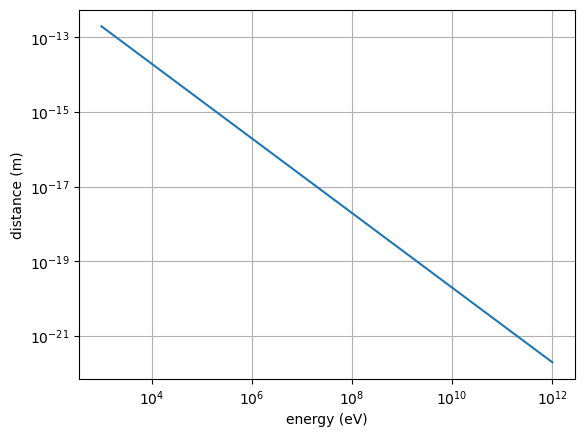

In [23]:
fempto, Giga = 1e-15, 1e6
dis = lambda ene : hbarc / (ene/Giga) * fempto 
enes = np.array((1e3, 1e6, 1e9, 1e12))
plt.plot(enes, dis(enes)); plt.xscale('log'); plt.yscale('log'); plt.grid()
plt.xlabel('energy (eV)'); plt.ylabel('distance (m)');


## Recordatorio de la cinemática relativista

### Transformaciones de Lorentz

La transformación de Lorentz nos relaciona el espacio-tiempo $(t, {\bf r})$ en un sistema inercial $\Sigma$ con el espacio-tiempo $(t', {\bf r}')$ en otros sistema inercial $\Sigma'$ que se desplaza respecto del primero con velocidad $v$ en la dirección $z$.

| |
|:--:|
|<img src="./imgs/fun_frames_relativity.png" width = 400 align="center">|
| Sistemas inerciales, $\Sigma'$ se desplaza con velocidad $v$ respecto $\Sigma$ [MT2.2]|

Einstein postuló que la velocidad de la luz, $c$, es la misma en los dos sistemas y nada puede viajar más rápido que la luz $v \lt c$. 

La luz producida en $t = t' = 0$, cuando el origen de los dos sistemas coincide, cumple: 

$$
c^2t^2 - {\bf r}^2 = c^2 t'^2 - {\bf r}'^2,
$$

donde ${\bf r} = (x, y, z)$, y de igual manera para ${\bf r}' = (x', y', z')$.



Se cumple esa condición si las coordenadas en los dos sistemas están relacionadas por la transformación de Lorentz.

$$
t' = \gamma \left( t - \frac{v}{c^2} z \right), \; x' = x, \; y' = y, \, z' = \gamma (z - vt) 
$$

donde introducimos, el **factor de Lorentz**, $\gamma$, y $\beta$:

$$
\gamma = (1 - \beta^2)^{-1/2}, \; \; \beta = v/c 
$$

En NU:

$$
t' = \gamma (1 - \beta z),  \; x' = x, \; y' = y, z' = \gamma (z - \beta t)
$$

$$
\begin{pmatrix} t' \\ x' \\ y' \\ z' \end{pmatrix} = 
\begin{pmatrix} \gamma         & 0 & 0 & -\gamma \beta \\
                 0             & 1 & 0 & 0 \\
                 0             & 0 & 1 & 0 \\
                 -\gamma \beta & 0 & 0 & \gamma 
\end{pmatrix}
\begin{pmatrix}t \\ x \\ y \\ z \end{pmatrix}
$$


Consideremos una partícula de masa $m$ que para un observador va a velocidad $\beta$ (en $z$). 

El sistema del observador es $\Sigma$, mientras que el sistema donde la partícula está en reposo (va a su misma velocidad) es $\Sigma'$

La tranformación de Lorentz de $\Sigma' \to \Sigma$ viene dada por:

$$
\begin{pmatrix} t \\ x \\ y \\ z \end{pmatrix} = 
\begin{pmatrix} \gamma         & 0 & 0 & \gamma \beta \\
                 0             & 1 & 0 & 0 \\
                 0             & 0 & 1 & 0 \\
                 \gamma \beta & 0 & 0 & \gamma 
\end{pmatrix}
\begin{pmatrix}t' \\ x' \\ y' \\ z' \end{pmatrix}
$$

¡simplemente la velocidad cambia de signo!

### cuatro-vectores

La magnitud ${\bf r}^2$, el módulo al cuadrado de un vector 3D, donde ${\bf r} = (x, y, z)$, es invariante bajo rotaciones.

Defininos el **cuadri-vector** como $x = (t, {\bf x}) = (t, x, y, z)$, y su *norma* al cuadrado, o producto escalar, viene dada por:

$$
x^2 = t^2 - {\bf x}^2,
$$

que es un **invariante** bajo transformaciones de **Lorentz**.

Si definimos $g_{\mu\nu}$ como la **matriz diagonal de la métrica**:

$$
g_{\mu\nu } = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}
$$

El producto escalar al cuadrado definido entre dos **cuadri-vectores**, $a, b$, se expresa como:

$$
a \, b =  g_{\nu\mu} a^\nu b^\mu  \equiv  \sum_{\mu=0}^3 \sum_{\nu = 0}^3 g_{\mu\nu} a^\nu b^\mu
$$

### cuadri-momento

Si consideramos una partícula de masa $m$, que para un observador se mueve a velocidad $\beta$ (en $z$). 

La partícula tiene energía $E$ y momento ${\bf p}$, y cumple la ecuación de Einstein (en UN):

$$
E = m^2 + {\bf p}^2 \;\; \Rightarrow \;\; m^2 = E^2 - {\bf p}^2
$$

que es válida en todos los sistemas inerciales (relacionados por transformaciones de Lorentz). 

Si definimos el **cuadrimomento** de una partícula como 

$$
p \equiv (E, \, {\bf p}),
$$

El cuadrimomento **es un cuadrivector**.

Su norma al cuadrado es un invariante Lorentz, $p^2 = E - {\bf p}^2 = m^2$, y coincide con la masa al cuadrado de la partícula.

En el sistema donde la partícula está en reposo, $\Sigma'$, el cuadrimomento es $p' = (m, {\bf 0})$.

Podemos obtener el cuadrimomento $p = (E, {\bf p})$ de la partícula en el sistema del observador, $\Sigma$, para el que la partícula tiene velocidad ${\beta}$ (en z) aplicando la transformación de Lorentz:

$$
p = (m \, \gamma,0, 0,  m \gamma \beta), 
$$

Esto es:

$$
E = m \, \gamma \;\;\; {\bf p} = m \, \gamma  \, {\vec \beta}.
$$

O podemos dar los parámetros de Lorentz a partir del cuadrimomento en el sistema del observador:

$$
\gamma = \frac{E}{m}, \;\;\; {\vec \beta} = \frac{{\bf p}}{E}
$$

## Interacciones y desintegraciones de partículas

### Interacciones

En física de partículas describimos las interacciones mediante la notación

$$
 a + b \to c + d
$$

En este caso, hay dos partículas iniciales $a, b$ y dos finales $c, d$. 

Diremos que las partículas iniciales tienen cuadrimomentos $p_a, p_b$ y las finales $p_c, p_d$.

Sabemos en la interacción se conserva:

 * la energía y el momento

 * la carga eléctrica (y dependiendo de la interacción, del sabor)

 * los números cuánticos leptónico y bariónico  


### creación de partículas

Si $c, d$ nos son $a, b$, ¡hemos creado nuevas partículas!

Podemos **crear nuevas partículas** al hacer **colisionar partículas** con la suficiente energía.

Por ejemplo mediante la interacción $\beta$ inversa:

$$
\bar{\nu}_e + p \to n + e^+
$$

podemos crear un $n$ y un $e^+$, siempre que el $\bar{\nu}_e$ tenga la suficiente energía al colisionar con un protón.

Veremos más adelante que esta interacción está mediada por el bosón $W^+$.

Observa que en la interacción $\beta$ inversa se conserva la carga, Q, y los números leptónico, $L$ y bariónico, $B$.




También podemos crear nuevas partículas (un par de fermión-antifermión) mediante **aniquilaciones** de un fermión con su antifermión.

por ejemplo: 

$$
e + e^+ \to \mu + \mu^+.
$$

Un par electrón y positrón se aniquilan y producen un par muón y antimuón. Veremos más adelante que este proceso está mediado o por un fotón o por un bosón $Z^0$.

La energía de los dos electrones necesaria para producir en el centro de masas, CM, los dos muones debe ser al menos $\sqrt{s} \ge 2 m_\mu$ (ver más adelante). En este caso, los dos muones aparecerían en reposo.

Notar que el anti-fermión de la aniquilación (o producción de pares) es siempre la antipartícula de fermión, en este caso $e^+$ es el anti-fermión de $e$, y el $\mu^+$ es el anti-fermión de $\mu$. 

Por lo tanto, siempre que creamos por aniquilación antimateria creamos a su vez la materia complementaria.

### interacción por colisión o por blanco fijo


Recordemos que existen dos tipos principales de experimentos en Física de Partículas:

  * **colisionador**: haces de $e, e^+, p, \bar{p}$ colisionan entre sí, por ejemplo en [LEP](https://es.wikipedia.org/wiki/Large_Electron-Positron_collider) ($e +e^+$)

  * **blanco fijo** (*fixed target*): haces de $e, p, \mu, \nu$ chocan contra un blanco (átomos, núcleos). Los experimentos de neutrinos son de blancos fijos, por ejemplo [Gargamelle](https://en.wikipedia.org/wiki/Gargamelle).



 

#### Creación de partículas en colisiones o en blanco fijo

Las figuras muestran un dibujo del detector CMS (colisiones $(p, p)$ del LHC) y de SuperKamiokande (blanco fijo donde interaccioan neutrinos).

| | |
|:--: | :--: |
| <img src="./imgs/intro_CMS.jpg" width = 400 align="center">|  <img src="./imgs/intro_SK.jpg" width = 250 align="center">|
| esquema del CMS [CERN] | dibujo de SK [SK] |

SuperKamiokande (SK) un gigantesco tanque de 50 kton de agua que actua como blanco donde interactuan los neutrinos solares, atmosféricos y de un haz desde JPARC. 
Se está construyendo un detector mayor, HyperKamiokande, [HK](https://www-sk.icrr.u-tokyo.ac.jp/en/hk/), que operará en 2027.

### Interacción en colisión o en blanco fijo

La figura muestra el caso de colisión de dos partículas $a, b$ (izda) y de interacción de una partícula $a$ contra un blanco fijo $b$ (derecha).

| |
|:--|
| <img src="./imgs/intro_collider_target.png" width = 600 align="center">|
| colisión central (izda) y en blanco (derecha) de dos partículas $a, \, b$.|

A partir de los cuadrimomentos de las partículas $p_a, \; p_b$, definimos la variable $s$, el cuadrado de la suma de los momentos iniciales,

$$
s = (p_a + p_b)^2,
$$

que es un invariante Lorentz, es uno de los invariantes de Mandelstam.


En un mismo sistema inercial, la suma de cuadrimomentos iniciales es igual a los finales, por conservación de la energía y el momento antes y después de la interacción.

$$
\sum_{i \in \mathrm{iniciales}} p_i = \sum_{j \in \mathrm{finales}} p_j \Rightarrow s = \left(\sum_{i \in \mathrm{iniciales}} p_i \right)^2 = \left(\sum_{j \in \mathrm{finales}} p_j \right)^2
$$

Por lo tanto $s$ se conserva en la interacción.

Además, por ser invariante Lorentz, podemos calcular $s$ en el sistema inercial que más nos convenga.

Consideremos el caso, $a+b \to c$, donde el choque en el centro de masas de $a$ y $b$, produce una tercera partícula $c$ de masa $m_c$.

El momento inicial total en el centro de masas es nulo, esto es ${\bf p}_b = - {\bf p}_a = {\bf p}^*$, por lo que $c$ queda en reposo, ${\bf p_c} = 0$.

El valor de $s$ antes de la colisión, $s = (p_a+p_b)^2$ y después, $s = p^2_c$, es el mismo:

$$
s = (p_a + p_b)^2 = ((E_a, {\bf p}^*) + (E_b, -{\bf p}^*))^2 = (E_a+E_b, {\bf 0})^2 = (E_a+E_b)^2, \\ s = (m_c, {\bf 0})^2 = m^2_c
$$

Las cantidades con $p^*$ se refieren en general al sistema CM.

Esto es:

$$
m_c = E_a + E_b 
$$

Luego $\sqrt{s}$ correspondería a la masa de la particula producida, y en el caso general a la energía disponible para crear partículas, o a la **energía en el centro de masas**.


Veamos cuánto vale $\sqrt{s}$ en un experimento de colisión en el centro de masas, CM, y otro de blanco fijo.

1. En una **colisión en el CM**: 

$$
{\bf p}_b = - {\bf p_a}  = - {\bf p}^* \Rightarrow s = ((E_a, {\bf p}^*) + (E_b, - {\bf p}^*))^2 = (E_a+E_b)^2
$$ 
  
  Si consideramos el caso en el que $m_a (m_b) \ll E_a (E_b)$, entonces $E_a = E_b = E$, obtenemos:
 
$$
s = (2 E)^2 \Rightarrow \sqrt{s} \propto E
$$ 
  
2. En una interacción **en blanco fijo**:
  
$$
s = ((E_a, {\bf p}_a) + (m_b, 0))^2 = E^2_a + 2 E_a m_b + m^2_b - {\bf p}^2_a = m^2_a + m^2_b + 2 \, m_b \, E_a.
$$
  
  En el caso de antes, donde las masas son despreciables respecto a su energía, $m_a \ll E_a , \;\; E_a = E$, obtenemos:
  
$$
s = 2 m_b E_a \Rightarrow \sqrt{s} \propto \sqrt{E}
$$

En el caso de los colisionadores, $\sqrt{s}$, crece con $E$ y en el caso del blanco fijo con $\sqrt{E}$.


*Cuestión:* considera el caso de $E = 100$ GeV, ¿En qué tipo de experimento podríamos crear partículas de mayor masa?

*Ejemplo:* ¿Cuál es la energía mínima de un neutrino para que tenga lugar la interacción beta inversa en un blanco fijo?

$$
\bar{\nu}_e + p \to n + e^+
$$

*Solución:*

El valor de $s$ es igual, calculado como el cuadrimomento total de las partículas iniciales *o* finales.

La iniciales, en el *sistema de laboratorio*, considerando la energía del neutrino $E$ y su masa nula.

$$
p_{\bar{\nu}_e} = (E, E \, {\bf k}), \;\; p_p = (m_p, {\bf 0}) \Rightarrow s = (E+m_p, E \, \bf{k})^2
$$

Para las finales, considerando el *sistema centro de masas*, y su energía mínima (que las dos se produzcan en reposo). El valor *mínimo* de $s$ es:

$$
p_n = (m_n, {\bf 0}), \;\; p_{e^+} = (m_e, {\bf 0}) \Rightarrow s = (m_n + m_e, {\bf 0})^2
$$

Del hecho de que el valor de $s$ es igual antes y después de la interacción,

$$
(E+m_p, E \,{\bf k})^2 = (m_n+m_e, {\bf 0})^2, \\
(E+m_p)^2 - E^2 = (m_n+m_e)^2, \\ 2m_p E +  m^2_p = (m_n+m_e)^2,
$$

obtenemos que la energía umbral del neutrino para producir una interacción $\beta$ inversa es

$$
E = \frac{(m_n+m_e)^2 - m^2_p}{2 m_p}.
$$

In [8]:
m_p = units.value("proton mass energy equivalent in MeV")
m_n = units.value("neutron mass energy equivalent in MeV")
m_e = units.value("electron mass energy equivalent in MeV") 
E = ((m_n + m_e)**2 - m_p**2)/(2 * m_p)
print("Energía umbral del nuetrino = {:4.3f} MeV".format(E))

Energía umbral del nuetrino = 1.806 MeV


### Desintegraciones de partículas

Las partículas inestables (todas a excepción de $p, e, \nu$), se desintegran a otras partículas

El siguiente esquema muestra la **desintegración** de una partícula $a$, en reposo, en dos $b, d$, con masas $m_a, m_b, m_c$.

| |
|:--:|
|<img src="./imgs/intro_drawing_decay2.png" width = 400 align="center">|
| Esquema de desintegración de la partícula $a$ a dos $b, c$ en el CM|

En el CM los momentos de $b, c$ son iguales, $p^*$, y ese caso se cumple:

$$
s = (m_a, {\bf 0})^2 = m^2_a = (p_b + p_c)^2 = (E_b+E_c, {\bf 0})^2
$$

*Ejercicio:* Calcula cuánto vale $p^*$ en función de $m_a, m_b, m_c$.

##### Desintegraciones a varias partículas

Consideramos ahora una partícula con masa $m_a$ que se desintegra a varias, $n$, partículas, cada una con cuadrimomento $p_i$ y masa $m_i$. 

Calculamos $s$ inicial en el sistema donde $a$ están en reposo, y $s$ final en el sistema del laboratorio. 

$$
s = (m_a, {\bf 0})^2 =  m^2_a, \\
s = \left(\sum_{i = 1}^n p_i \right)^2 = \left( \sum_i E_i, \, \sum_i {\bf p}_i \right)^2 = \left( \sum_i E_i \right)^2 - \left( \sum_i {\bf p}_i \right)^2,
$$

donde $p_i$ es el cuadrimomento de la partícula $i$, con energía $E_i$ y momento ${\bf p}_i$, en el sistema de laboratorio. 

La variable $s$ se corresponde a la masa al cuadrado del sistema (que se llama redundantemente **masa invariate** al cuadrado). 

$$
s = \left( \sum_{i  = 1}^n  p_i \right)^2
$$

Si las $n$ partículas provienen de la desintegración de $a$ entonces su masa invariante nos permite **detectar la partícula** a que se desintegró.

En la siguiente figura se muestra el espectro de la masa invariante de dos muones ($\mu, \mu^+$) obtenida con los datos del LHCb en el Run-I y Run-II. 

El pico a ~5.4 MeV, corresponde a la masa del $B_s$. El resto de eventos se consideran de contaminación.

| |
|:--:|
|<img src="./imgs/intro_massinv_Bsmumu.png" width = 700 align="center">|
| Espectro de la masa invariante y observación de $B_s \to \mu + \mu^+$ en los datos del Run-I (izda) y Run-II (dcha) del experimento [LHCb] (2021)|

*Nota:* Que la estadística en el Run-I para determinar si existe un pico en el $B_s$ es insuficiente.

## Observables


En física de partículas habitualmente estimamos (o ponemos límites en su valor) a:

  * la **sección eficaz**, $\sigma$, de una interacción (en barn). En algunos experimentos se mide la distribución angular de las partículas o **la sección eficaz diferencial**. 
  
  * el **tiempo de vida media**, $\tau$, (s), cuando la partícula es de vida "corta", o su inverso, la **anchura de desintegración**, $\Gamma$, (MeV), cuando la partícula es una resonancia.
    
  * la **fracción de desintegración**, $\mathcal{Br}$, en un canal (%). El porcentaje de veces que un partícula se desintegra en un canal, por ejemplo el $\tau$ se desintegra a $\mu + \bar{\nu}_\mu + \nu_\tau$ un 17.8% de las veces. 
  

### Sección eficaz

| | 
| :--: | 
|<img src="./imgs/fun_drawing_xsection.png" width = 400 align="center">|
| Esquema explicativo del significado de la sección eficaz MT1|


La sección eficaz, $\sigma$, cuantifica como un área efectiva, dada habitualmente en barn $\mathrm{b} = \mathrm{cm}^{-24}$, la razón de interacciones si sobre una partícula blanco golpea un flujo $\Phi$ de partículas sonda (dado en $\mathrm{cm}^2/s$).

En el caso de un experimento de blanco fijo y de un flujo, $\Phi$, sobre un blanco con $N$ blancos, la razón de producción es:

$$
\nu = \sigma \Phi  N
$$

donde $\nu$ es el promedio de las interacciones, que siguen una distribución de Poisson.

En general también estudiaremos la sección eficaz diferencial (en función de la energía y/o del ángulo sólido)

La siguiente figura muestra la sección eficaz $\sigma(e+e^+ \to \mathrm{hadrons})$ vs $\sqrt{s}$ medida en el experimento OPAL (2001), uno de los 4 experimentos de LEP.

| | 
| :--: | 
| <img src="./imgs/intro_Zreso_OPAL.png" width = 400 align="center">|  
| $\sigma(e+e^+\to \mathrm{hadrons})$ vs $\sqrt{s}$ (puntos) y predicción del SM (linea)  [OPAL]| de la interacción $\sigma(e+e^+ \to \mathrm{hadrons})$ vs $\sqrt{s}$ en la resonancia del $Z^0$.



Notas que:
    
   * La sección eficaz está en nbarns.
    
   * La resonancia del $Z$ sigue una curva de Breit-Wigner, con media $m_z = 91.1852 \pm 0.0030$ GeV y anchura $\Gamma_Z = 2.4948 \pm 0.004$.
   
La sección eficaz es proporcional a la curva de Breit-Wigner:

 $$
 \sigma(s) \propto \frac{1}{(s-m^2_Z)^2 + m^2_z \Gamma^2_Z}
 $$
 
*cuestión* Estudiar los casos $\sqrt{s} = m_Z, \; \sqrt{s} = m_z \pm \frac{\Gamma_Z}{2}$
 
*Nota adicional*: La curva teórica de la figura anterior está corregida por la radiación de fotones en los estados inicial y  final.

*Cuestión*: Calcula la razón de producción de $Z \to \mathrm{hadrons}$ en el pico de $Z$ en OPAL usando la luminosidad de LEP.

In [5]:
sigma   = 31 * units.nano # bars
barn_si = 1e-24 # cm2
lumi    = 1e32 * barn_si  # /bar s 
R       = lumi * sigma
print('Razón de producción Z -> hadrons en OPAL = {:4.1f} Hz'.format(R))

Razón de producción Z -> hadrons en OPAL =  3.1 Hz


### Anchura de desintegración

Las desintegraciones se caracterizan por su anchura o por su tiempo de vida media.

Un sistema de N partículas en un volumen V que se desintegran con una frecuencia fija:

$$
\frac{\mathrm{d}N}{\mathrm{d}t} = - \Gamma N; \;\;\;\;
N(t) = N \, e^{-\Gamma t}
$$

A $\Gamma$ la llamamos **anchura de desintegración** y a su inverso, $\tau$ **tiempo de vida media**:

$$
\tau = \frac{1}{\Gamma}, \;\; N(t) = N \, e^{-t/\tau}
$$

Por ejemplo:

  * la vida media del $\tau$ es 0.296 ps
    
  * La anchura de desintegración del $Z$, $\Gamma_Z \simeq 2.5$ GeV.


### Fracción de desintegración

En el caso de que la partícula se desintegra a varios, $n$, canales, $i = 0, \dots, n$.

Para cada uno habrá una **anchura parcial de desintegración**, $\Gamma_i$

La anchura total será la suma de las parciales:

$$
\Gamma = \sum_{i=1}^{n} \Gamma_i
$$

Y llamaremos fracción o razón de desintegración, $\mathcal{Br}_i$, de un canal al porcentaje de veces que una partícula se desintegra en ese canal, que corresponde a:

$$
\mathcal{Br}_i = \frac{\Gamma_i}{\Gamma}
$$


Las fracciones de desintegración, $\mathcal{Br}$, del leptón $\tau$ son:

|      |   |  |
|:--:  | :--: | :--: |
| $\tau \to e + \bar{\nu}_e + \nu_\tau$ | $\tau \to \mu + \bar{\nu}_\mu + \nu_\tau$ | $\tau \to \mathrm{hadrons} + \nu_\tau$ | 
| ------- 17.4% -------- |-------- 17.8% ---------- | ---------- $\sim 64$% ------------|

La anchura total es la suma de las particales:

$$
\Gamma = \Gamma(\tau \to e + \bar{\nu}_e + \nu_\tau) + \Gamma(\tau \to \mu + \bar{\nu}_\mu + \nu_\tau) + \Gamma(\tau \to \mathrm{hadrons} + \nu_\tau) 
$$

Y la fracción de desintegración es:
$$
\mathcal{Br}(\tau \to \mu + \bar{\nu}_\mu + \nu_\tau) = \frac{\Gamma(\tau \to \mu + \bar{\nu}_\mu + \nu_\tau)}{\Gamma}
$$


*Cuestión*: Calcula la anchura de desintegración en MeV del $\tau$

*Cuestión*: Calcula las anchuras de desintegración parciales del $\tau$.

In [6]:
hbar = units.hbar/units.eV # eV s
tau   = 0.296 * units.pico  # s
gamma_tau = hbar / tau     # eV
print('Gamma \t = {:e} eV '.format(gamma_tau))
brs = (('e', 14.7), ('mu', 17.8), ('hadrons', 65))
for name, br in brs:
    print('Gamma_{:s} \t = {:e} eV'.format(name, gamma_tau * br * 1e-2))

Gamma 	 = 2.223689e-03 eV 
Gamma_e 	 = 3.268823e-04 eV
Gamma_mu 	 = 3.958166e-04 eV
Gamma_hadrons 	 = 1.445398e-03 eV


Las anchuras de desintegración las medimos directamente de la anchura de la resonancia en el espectro de energías.

O si la partícula "vuela" lo suficiente para ser detectada podemos determinar el vértice primario y secundario y conocido su momento estimar su tiempo de vida media.

[Para esta sección ver AB1.6]

## Parámetros fundamentales de los experimentos

### Parámetros de un colisionador

Los dos parámetros fundamentales de un colisionador son:
    
 * **Energía** en el centro de masas, $\sqrt{s}$, que determina las partículas que se pueden crear en la colisión, (que ya vimos).

 * **Luminosidad**, $\mathcal{L}$, o el número de partículas que lanzamos entre ellas por unidad de área y tiempo. Establece el número de interacciones en cada cruce. 

La frecuencia de eventos, en Hz = $\mathrm{s}^{-1}$, que se producen por cruce, $\nu$ es el producto de la luminosidad $\mathcal{L}$ y una sección eficaz, $\sigma$:
    
$$
 \nu = \mathcal{L} \, \sigma.
$$



La luminosidad puede depender del tiempo. 

Llamamos luminosidad instantánea a $\mathcal{L}(t)$  y la integral en un tiempo $T$, $\int_0^T \mathcal{L}(t) \mathrm{d}t$, **luminosidad integrada**.

La luminosidad se mide en $\mathrm{cm}^{-2}\mathrm{s}^{-1}$ y la luminosidad integrada en $\mathrm{cm}^{-2}$, o en $\mathrm{b}^{-1}$ (generalmente en fb).

La relación entre barn y área es:

$$
\mathrm{b} = 10^{-24} \mathrm{cm}^2
$$

#### Los parámetros de los colisionadores principales

Esta es una lista de algunos colisionadores:

| colisionador | laboratorio| Tipo  ----     | Periodo    | Energía, $\sqrt{s}$, (GeV) | Luminosidad, $\mathcal{L}$, ($cm^{-2}s^{-1})$ ---|
| :--:      | :--:      | :--:       | :--:      | :--:             | :--: |
| PEP-II   | SLAC       | $e+e^+$   | 1999-2009 | 10.5             | $1.2 \, 10^{34}$|
| LEP      | CERN       | $e+e^+$   | 1989-2000 | 90-209           | $10^{32}$ |
| Tevatron | Fermilab   | $p+\bar{p}$ | 1987-2012 | 1960             | $4 \, 10^{32}$ |
| LHC      | CERN       | $p+p$      | 2009-     | 7000-13000            | $10^{34}$| 

Luminosidad integrada del LHC a lo largo de los años de funcionamiento.

| |
| :-- |
|<img src="./imgs/det_LHC_intlumi.png" width = 600 align="center">|
| Lunimosidad integrada del LHC [CERN]|

*Cuestion*: ¿Cuántos Higgs se han producido en el LHC Run-II si la sección eficaz de producción es $\sigma = 56 \pm 4$ pb?

In [4]:
lumi  = 160. / units.femto # 1/barn
sigma =  56. * units.pico  #   barn
N     = lumi * sigma
print('Numero de Higgs producidos por el LHC en el Run-II a sqrt(s) = 13 TeV = {:e}'.format(N))

Numero de Higgs producidos por el LHC en el Run-II a sqrt(s) = 13 TeV = 8.960000e+06


Para calcular una sección eficaz, necesitamos conocer la luminosidad. 

Si un experimento detecta $N$ eventos con una eficiencia $\epsilon$, con una luminosidad $\mathcal{L}$

$$
\sigma = \frac{N}{\epsilon \mathcal{L}}
$$

Si no se conoce la luminosidad, se puede normalizar la sección eficaz, $\sigma'$, conocida. 

Si detectamos $N'$ eventos, con una eficiencia $\epsilon'$ con la misma luminosidad, $\mathcal{L}$, entonces:

$$
\sigma = \frac{N \epsilon'}{N' \epsilon}
$$

### Parámetros de los experimentos en blanco fijo

Los parámetros fundamentales de un experimento de blanco fijo son:

  * la **energía** del haz incidente, $E$, recordemos $\sqrt{s} = \sqrt{2 m_b E_a}$
  
  * el **flujo de haz**, $\Phi$, las partículas que atraviesan una unidad de área por unidad de tiempo.
  
  * el **número de partículas blanco**, $N$, que es proporcional a la masa del blanco.
 
La frecuencia de eventos, en Hz, en un experimento de blanco fijo viene dada por:

$$
\nu = \phi \, \sigma N
$$

donde, por ejemplo, sin el blanco son los protones de los núcleos del material con $(A, Z)$

$$
N = \frac{Z N_A}{A} M
$$

donde $M$ es la masa del blanco, en g, $A$ el número de masa g/mol, $N_A$ el número de Avogadro, y $Z$ el número de protones en cada núcleo.

Notar que en este caso, podemos asociar:

$$
\phi N = \mathcal{L}
$$

a una lumonisidad efectiva

### Longitud de absorción

Pero si el blanco es extenso, conforme el haz penetra, la intensidad de éste disminuye. 

Definimos la intensidad como $I = \Phi \, S$, donde $S$ es el área transversal del haz.

Si la densidad de los elementos blanco es $n$, y el haz penetra normal en el blanco (en la dirección $z$) con flujo inicial $\Phi$, y el blanco tiene una sección trasversal $S$, la variación de de la intensidad, $dI$ viene dada por:

$$
\mathrm{d}I(z) =- \sigma n \Phi S \mathrm{d}z \;\;\; \Rightarrow \;\;\; I(z) = I_0 e^{-n \sigma z} = I_0 e^{-z/\lambda}.
$$

La intesidad decae de forma exponencial.

Llamamos **longitud de absorción** a la cantidad $\lambda = 1/(n \sigma)$, e indica a qué distancia la intensidad del haz se ha reducido en un factor $1/e.$

[Para esta sección ver MT2.1, MT2.2, AB1.1, AB1.3, AB1.5]

## Una perspectiva experimental

Vamos a revisar brevemente cómo se detectan las partículas, lo que a su vez está relacionado con cómo interacionan con la materia.

Luego revisaremos el funcionamiento de algunos detectores, la estructura genérica de los experimentos y la dinámica del análisis de datos en Física de Partículas.


### Interacción con la materia


Desde el punto de vista de su detección, podemos distinguir dos rangos principales de partículas :

* Las partículas *estables*, $p, e, \nu$; o con *vida media "larga"* cargadas, $\mu, \gamma, K, \pi^\pm$, (recorren $\mathcal{O}$(m))
 
   * Se detectan como **trayectorias o depósitos de energía** en el detector.
   
   * La identidad de las partículas puede determinarse por su rango de **penetración, ionización, producción de luz** en los materiales y por sus **desintegraciones**.
  

* La identificación de las partículas de *vida media "corta"*, $<\mathcal{O}$(ps), puede realizarse de dos formas: 
  
   * Si la partícula "vuela" del orden $\mathcal{O}$(cm), podemos determinar su **vértice de desintegración** con detectores precisos de trazas (ie. $\tau$).
  
   * Si la partícula tiene un tiempo de vida media extremadamente pequeño, se desintegra en su lugar de producción, y podemos observarla como una **resonancia** en el espectro de energías de la producción o mediante la **masa invariante** de las partículas producidas en su desintegración.


Las interacciones de las partículas con la materia pueden clasificarse en:

   * interacciones de las partículas cargadas ($e$, $\mu$, $p$, $K^\pm$, $\pi^\pm$)
   
   * interacciones electromagnéticas de electrones y fotones ($e$, $\gamma$)
   
   * interacciones fuertes de hadrones ($\pi, K, ...$).

#### Las partículas cargadas

Pueden excitar los átomos o moléculas o ionizar (separar los electrones)

La mayor parte de los detectores de trayectorias usan la ionización del medio tras el paso de las partículas cargadas.

La pérdida de energía $\frac{\mathrm{d}E}{\mathrm{dx}}$ por distancia debido a la ionización sigue la ecuación de Bethe-Bloch (1930s):

$$
\frac{1}{\rho}\frac{\mathrm{d}E}{\mathrm{d}x} \simeq - K \frac{Z}{A \beta^2}\left[ \ln \left( \frac{2  m_e c^2 \beta^2 \gamma^2}{I_e}\right) - \beta^2\right]
$$

Donde $K = \frac{4\pi \hbar^2 \alpha^2 N_A}{m_e} = 0.307$ MeV $\mathrm{cm}^2$/mol, $\alpha$ es la constante de estructura fina, $m_e$ la masa del electrón, $N_A$ el número de Avogadro, $I_e$ un potencial de ionización que depende del material $(A, Z)$, $\rho$ la densidad, y $\gamma, \beta$ los parámetros de Lorentz asociados a la velocidad $\beta$ de la partícula.

La pérdida de energía tiene una curva general en función principalmente de $\gamma \beta$ y del material

| |
|:--|
|<img src="./imgs/det_eneloss_mip.jpg" width = 400 align = "center">|
|pérdida de energía por ionización [PDG]|

  

El recorrido medio de una partícula con $\beta$ hasta que se detiene en un medio se denomina **rango** de penetración.

La pérdida de la energía depende de la velocidad de la partícula $\beta$. Distinguimos tres regiones:
 * La pérdida es más intensa para baja $\beta$ (de la dependencia $1/\beta^2$). La ionización es mayor al final de la trayectoria, o **región de Bragg**.
 * En el rango de $\beta\gamma$ de $1-10$, esa región se denomina **mip** (*minimum ionizing particle*).
     Un muón de 10 GeV en hierro pierde en promedio 13 MeV/cm y su rango es de varios metros.
 * Para $\beta \gamma >100$, la perdida aumenta de forma logaritmica. A partir de aquí los efectos de radiación son relevantes.

#### Detectores gaseosos

En los detectores gaseosos se utiliza la ionización ($\sim 30$ eV por ionización) del paso de las partículas cargadas en gases nobles, por ejemplo Ar, Xe. 

Los detectores están, en general, en un rango de voltage proporcional (no hay efecto avalancha). 

El paso de la partícula deja un reguero de electrones de ionización.

Esos electrones derivan bajo la presencia de un campo eléctrico ${\bf E}$ hasta el ánodo donde se recoge la carga.

Existen varios tipos de detectores: *wire chambers*, *multiproportional wire chambers (MPWC)*, *time projection chambers (TPC)*.

##### Cámaras de proyección temporal (TPC)

Las TPC suelen tener forma de barril, pueden ser simétricas, con dos tapas como ánodos y un cátodo central de HV.

Bajo la presencia del campo eléctrico, los $e$ de ionización derivan hasta el ánodo.

Son recogidos por un detector segmentado (hilos) en dos direcciones ($r, \phi$) o ($x, y$), donde se amplifica su carga (electrónica frontal).

El tiempo de llegada de los electrones al ánodo, $\Delta t$, sirve para estimar la posición en $z$ (el eje de la cámara).  

Las TPCs son excelentes detectores de trazas

| | |
|-- | -- |
| <img src="./imgs/det_ALICE_TPC_scheme.png" width = 400 align = "center">| <img src="./imgs/det_ALICE_ppevent.jpeg" width = 400 align = "center"> |
| [ALICE TPC](https://alice-collaboration.web.cern.ch/menu_proj_items/tpc) | ALICE evento reconstruido [ALICE]|

Las TPC se utilizan también en experimentos de búsqueda de materia oscura, XENON, detectores de neutrinos EXO, NEXT.

La fórmula calcula el valor promedio. La distribución $\mathrm{d}E/\mathrm{d}x$ está relacionada con la fluctuación del número de colisiones de la partícula con los electrones de los átomos.

| |
|:--|
|<img src="./imgs/det_eloss_alice_tpc.png" width = 400 align = "center">|
| pérdida de energía en la TPC de ALICE [ALICE]|

Pérdida de energía en la TPC (*Time Projection Chamber*) de ALICE.

Los electrones pierden tambien energía por radiación **bremsstrahlung** (en la siguiente sección).

En los detectores de trazas se detecta la ionización (electrones liberados) del paso de la partícula cargada a través del medio para determinar puntos de paso o *hits*. 

Los detectores están inmersos en un campo magnético, ${\bf B}$, (Teslas) que produce una curvatura de la partícula proporcional a su momento, ${\bf p}$ (GeV)  en la dirección perperdicular a ${\bf B}$. Si entre ambos tiene un ángulo $\theta$:

$$
p_T \equiv p \, \sin \theta = 0.3 \, B \, \rho,
$$

donde $\rho$ (m) es el radio de curvatura en el plano perperdicular, $B$ (T) el campo magnético.

Llamamos al momento en el plano perperdicular, **momento transverso**, $p_T = p \sin \theta$.

Para CMS con $B = 4$ T, y un $\pi^\pm$ de $p$ 100 GeV, $\rho \sim 100$ m.  

##### Detectores de silicio

Están basados en vaciar de portadores libres de carga una oblea de silico (aprox $~300\; \mu\mathrm{m}$ de espesor) donde se han dopado tiras (*strips*) de tipo $p$, separadas aprox $~50$ $\mu\mathrm{m}$, para crear uniones $pn$.

| |
| :-- |
<img src="./imgs/det_silicon_detector.png" width = 400 align = "center">
|Esquema de un sensor de micro-strips de silicio|

La ionización del paso de una partícula cargada crea pares electrón/hueco ($\mathcal{0}(1)$ eV).

Los electrones de ionización derivan hacia las tiras $p$, donde su carga es amplificada por la electrónica (*front end electronics*).

Con estos detectores se pueden reconstruir las trayectorias con precisión $\sim 10$ $\mu\mathrm{m}$ e identificar vértices de desintegración de partículas que pueden recorrer $\sim  1$ cm.

| | |
|-- | -- |
| <img src="./imgs/det_DELPHI_vertex.jpeg" width = 350 align = "center">| <img src="./imgs/det_DELPHI_bdecay.gif" width = 350 align = "center"> |
|detector de vértices de DELPHI | vista transversa de un evento [DELPHI]|

ATLAS y [CMS](https://cms.cern/detector/identifying-tracks/silicon-strips) utilizan detectores de silicio, que se desarrollaron a partir de 80's. Estos detectores fueron esenciales en los experimentos de LEP, BaBar, Belle entre otros y FERMI, en astropartículas.

### Interacciones electromagnéticas

#### Interacciones de los electrones

Las partículas cargadas pueden radiar fotones por la interacción electromagnética con los protones de los núcleos. Esta radiación se llama **bremsstrahlung**.

$$e^- + (A, Z) \to e^- + \gamma + (A, Z)$$ 

Esta radiación empieza a ser dominante a partir de una **energía crítica** $E_c \sim 800/Z$ MeV, antes domina la ionización.

Este proceso se puede calcular en QED (*Quantum Electro-Dynamics*) y su sección eficaz: 

$$\sigma_{b} \propto E/m^2.$$

Afecta más a los electrones que a los muones por un factor $(m_e/m_\mu)^2$. 

Los muones por debajo de $\mathcal{O}(100)$ GeV pierden energía principalmente por ionización. 

La pérdida de energía por bremsstrahlung por encima de una energía umbral, $E_c$, puede expresarse:

$$
\frac{\mathrm{d}E}{\mathrm{d}x} = - \frac{E}{X_0}, \;\; E(x) = E_0 \, e^{-x/X_0},
$$
donde $X_0$ se denomina **longitud de radiación** y $E_0$ es la energía inicial del electrón.

| |
| :-- |
|<img src="./imgs/det_AB1.1_electron_xsec_Pb.png" width = 400 align = "center">|
|energía perdida para electrones|



$X_0$ depende del material. Notar que $X_0 = n \sigma_b$, donde $n$ es la densidad de núcleos.

| H$_2$ | H$_2$O | $_{12}$C | $_{54}$Xe | $_{26}$Fe  | $_{82}$Pb | 
| :--   | :--    | :--     | :--  | :--         | :--       |
| 7.6 km  | 36.1 cm | 18.8 cm | 15.47 cm | 1.76 cm | 0.56 cm |

$X_0$ es la distancia a la que electrón ha perdido en promedio $1/e$ de su energía.


#### Interacciones de los fotones

Las interacciones de los fotones con la materia dependen de su rango de energía, por debajo del MeV domina el efecto foto-eléctrico, en el rango de MeVs, la dispersión Compton, y por encima 10 MeV, la producción de pares.

| |
| -- |
| <img src="./imgs/det_AB1.1_gamma_xsec_Pb.png" width = 340 align = "center">|
| sección eficaz de fotones en plomo [AB1.1]|

A altas energías el efecto dominante será la producción de pares.

$$
\sigma_\gamma \simeq \frac{7}{9} \frac{1}{n X_0},
$$
donde $n$ es la densidad de núcleos.

La cantidad $\lambda = 1/(n \sigma_\gamma)$ es el **camino libre medio**, que vale $\lambda \simeq 7/9 X_0$. Nos indica la distancia a la que el número de fotones, o la intensidad del haz, se reduce en $1/e$:

$$
\frac{\mathrm{d}I}{\mathrm{dx}} = - \frac{I}{\lambda}, \;\; I(x) = I_0 e^{-x/\lambda}
$$

Por lo tanto la longitud de radiación, $X_0$ caracteriza la pérdida en un médio de energía de electrones y fotones por encima de $\sim 10$ MeV.


#### Calorímetros electromagnéticos

$$
$$

| | |
| :--: | :--: |
| <img src="./imgs/det_gamma_cascade.png" width = 300 align = "center">| <img src="./imgs/det_gamma_cascade_real.png" width = 300 align = "center"> |
| Esquema de cascada [AB]| Cascada [AB]| 



Los **calorímetros electromagnéticos** tienen una estructura alternada de material pasivo (por ejemplo Pb, alto $Z$, bajo $X_0$), donde se desarrollan las cascadas, y  material activo, donde se detecta la ionización (i.e centelleadores) con alto $X_0$.

La energía depositada es proporcional a la energía incidente del $e$ o $\gamma$ y la resolución en energía, $\sigma_E$, está limitada por las fluctuaciones en la producción de las partículas (que es proporcional a $\sqrt{E}$) en la cascada):

$$
\frac{\sigma_E}{E} \sim \frac{3 - 10 \mathrm{\%}}{\sqrt{E \;\mathrm{(GeV)}}}
$$

Los **centelleadores** contienen moléculas que se excitan al paso de la partícular cargadas, y al de-excitarse emiten luz en el visible que puede detectarse con sensores de fotones (por ejemplo **foto-multiplicadores**).  

El número de fotones es proporcional a la energía absorbida, aproximadamente 100 eV por fotón de centelleo. 

Los centelleadores deben tener una $X_0$ alta para evitar la conversión de los fotones.

#### PMT

Los photomultiplicadores, PMTs, son sensores que detectan fotones via el efecto foto-eléctrico, y generan una avalancha de electrones entre dínodos consecutivos, como en la figura:


| |
| -- |
| <img src="./imgs/det_PMT_drawing.png" width = 550 align = "center">|
| Esquema de funcionamiento de un PMT [WK]|


Se utilizan para medir la luz en cristales, plásticos centelleadores, etc. Y forman parte de calorímetros y de cámaras de muones, entre otros. 

### Experimentos

#### Experimentos genéricos en $4\pi$

La siguiente figura muestra una sección del detector CMS del LHC. Los experimentos tienen una estructura en capas cilíndricas de detectores.

|  |
|:-- |
| <img src="./imgs/det_CMS_subdetectors.png" width = 500 align = "center"> |
| Esquema de un sector del *Compact Muon Selenoid* ([CMS](https://cms.cern/detector)) del LHC|

Imágenes de [CMS](https://home.cern/resources/image/experiments/cms-images-gallery)

Los detectores en colisionador habitualmente se les conoce como $4\pi$ porque detectan las partículas en "todo" el ángulo sólido.



En el interior están los detectores de trazas más precisos (habitualmente de detectores de silicio), sumergidos en un campo magnético (selenoidal, donde ${\bf B}$ va en el eje del cilindro), con los que se miden los momentos de las partículas cargadas.

Le siguen el calorímetro electromagnético y el hadrónico, para medir las energías de fotones, electrones y el resto de partículas, neutras pero también las cargadas que los alcanzen.

El último detector habitualmente es el detector de muones (que son las partículas más penetrantes junto con los neutrinos, claro)

#### Experimentos de blanco fijo o hacia delante

Un exerimento de blanco fijo solo tienen instrumentalizado un brazo de la interacción.

Están constituidos en general por la zona de interacción, de detectores de vértices, seguidos de trazas (en un campo magnético, dipolar), por los calorímetros electromagnéticos, hadrónico y finalmente por detectores de muones.

Es el caso de detector LHCb en el LHC.


|  |
|:-- |
| <img src="./imgs/det_LHCb_subdetectors.jpg" width = 500 align = "center"> |
| Esquema de un sector del *LHCb* ([LHCb](https://lhcb.cern/detector)) del LHC|

Imágenes de [LHCb](https://home.cern/resources/image/experiments/lhcb-images-gallery)


#### Procesado y análisis de datos

El sistema de disparo (*trigger*) reduce el rate de producción (40 MHz en el LHC) para seleccionar solo los sucesos relevantes ($\mathcal{0}(10)$ k). Para ello se lee parcialmente el detector y diversos algoritmos seleccionan los eventos relevantes (que tenga un muón de alto momento por ejemplo)

El sistema de adquisicón (DAQ) permite recoger y sincronizar los datos de un evento. Para ello se utilizan chips, y módulos de electrónica, en muchos casos diseñados específicamente para esta función.

El trigger y el DAQ forman parte del *online* del experimento



Posteriormente los eventos se procesan,  a partir de las señales de los sensores se reconstruyen posiciones, luego trazas, vértices, depósitos de energía y finalmente partículas y cuadrimomentos.

Para ello se utilizan programas en C++ o Python donde participan decenas o centenares de físicos.

Esta parte del procesado se conoce con el nombre de *offline*.

También se producen millones de eventos simulados en centros de computación, mediante técnicas de Monte-Carlo.

#### Análisis

Los eventos de una toma de datos se seleccionan y luego se analizan con técnicas de análisis de datos (*Neural Networks* por ejemplo). La estadística juega en esta etapa un papel esencial. Hay dos estadísticas enfrentadas: la bayesiana y la frequentista. Habitualmente ésta última es la habitual.

En general se utilizan como control datos de calibración y simulados (mediante técnicas de Monte-Carlo por ejemplo).

Las medidades de los experimentos se presentan como:

* La **estimación** de un observable, por ejemplo: una sección eficaz, la vida media, la masa o una fracción de desintegración. 

   Existen dos tipos de errores:

   * *estadísticos*: dependiendo de la cantidad de sucesos relevantes disponibles.

   * *sistemáticos*: que reflejan nuestras incertidumbres en parámetros que afectan al observable, que puede ser de diversa
    índole: de calibración, eficiencias de selección, teóricos, etc.

   Por ejemplo [la observación del Higgs en ATLAS](https://arxiv.org/abs/1207.7214), 
   

* Un **límite** en el observable como la vida media, masa, sección eficaz, etc, de una **búsqueda**.
  
   La determinación de un límite se presenta con un nivel de confianza (i.e 90%).

   Por ejemplo, el límite en [la masa del neutrino en KATRIN](https://arxiv.org/abs/1909.06048)

Notar que al establecer un límite no se dan errores, éstos están ya incluidos en la estimación del límite. 

El significado del intervalo de confianza depende de los métodos estadísticos utilizados.


### Breve introducción a los aceleradores


En un acelerador las partículas estables ($e, e^+ p, \bar{p}$) se agrupan en paquetes (*bunches*), con un número elevado de partículas, $\mathcal{O}(10^{11})$, que circulan en un tubo de vacío.

Se les acelera mediante gradientes de potencial en cavidades resonantes, se les mantiene en órbita mediante campos magnéticos dipolares y cuadripolares.

Existen dos tipos de aceleradores principales:

* **Lineales**, donde el acelerador es un dispositivo recto que los paquetes recorren una vez.

* **Circulares**, colisionadores, en los los paquetes giran en el tubo de vacío del haz numerosas vueltas $\mathcal{O}(10^5)$.


##### Acelerador lineal

Animación de un detector lineal y vista del acelerador lineal ($e, e^+$) en SLAC (California) de 3 km de largo.

| | |
| :--: | :--: | 
| <img src="./imgs/Linear_accelerator_animation_16frames_1.6sec.gif" width = 400 align="center"> | <img src="./imgs/det_slac_aerial.png" width = 200 align="center">|
| Acelerador lineal [Wikipedia]| Linar acelarator (SLAC) |


##### Aceleradores circulares

Vista aérea del LHC donde se sobreimponen las líneas de los túneles de los aceleradores del CERN.

| | |
|:-- | :-- |
| <img src="./imgs/det_CERN_accelerators_complex.png" width = 300 align="center"> | <img src="./imgs/det_LHC_aerial.png" width = 320 align="center"> | 
| Esquema de los aceleradores del CERN [[>]](https://www.youtube.com/watch?v=pQhbhpU9Wrg)|  vista del LHC (CERN) | 



Las partículas relativistas al girar pierden energía por radiación (**synchrotron radiation**) proporcional a $1/m^4$ por lo que este efecto es más dramático para $e$ que para $p$. Esta es la razón por la cual con aceleradores de $p$ se alcanzan energían mayores que con $e$

Para 'girar' a las partículas y mantenerlas en el anillo se utiliza un campo magnético dipolar $B$ perpendicular a su dirección. 

Por el electromagnetismo sabemos que $p = 0.3 B \, \rho$, donde $p$ es el momento, en TeV, $B$ el campo magnético, en T, y $\rho$ el radio, en km.

Para el Tevatron, en Fermilab, Chicago, $\rho = 1$ km. $B = 1.5$ T, y permite acelerar protones hasta 1 TeV.

Para obtener campos más intensos hay que recurrer a imanes superconductores.

Por otro lado, las partículas oscilan dentro de los paquetes y tienden a dispersarse y para mantenerlas juntas se utilizan campos magnéticos cuadripolares

En los **anillos de almacenamiento** se hacen girar dos haces de partículas en sentido opuestos. En el LHC por ejemplo hay dos anillos paralelos.

En determinados **puntos de colisión** mediante un conjunto de imanes se comprimen los paquetes y se cruzan para que tengan lugar las colisiones.

Este es el caso de LEP, el colisionador $e^+e^-$ del CERN, de 27 km de circunferencia, que funcionó a finales del siglo XX.

También es el caso del LHC, que ocupa el tunel donde antes estuvo LEP. LHC es un colisionador $pp$ con una energía $\sqrt{s} = 7-13$ TeV. 

Los dipolos superconductores del LHC operan a 8 T. Los paquetes contienen del orden de $10^{11}$ $p$ que recorren el anillo a una frecuencia de 40 MHz. 

El volumen de los paquetes es de 40 cm de largo y 1 mm de sección que se reduce a 10 $\mu\mathrm{m}$ en la zona de colisión.

#### Haces secundarios de hadrones, $\mu, \, \nu_\mu$.

| | 
|:--: | 
| <img src="./imgs/det_nubeam_schematic.jpg" width = 480 align="center"> | 
| Esquema del haz de neutrinos de FermiLab |
| <img src="./imgs/det_nubeam_DUNE.jpg" width = 480 align="center"> | 
|  Haz de $\nu$ de FermiLab a DUNE (en construcción)|



Se obtienen de golpear un haz primario (principalmente $p$) contra un blanco.

Se seleccionan las partículas de interés mediante un conjunto de imanes tuneados para permitir el paso de partículas con una carga y un momento determinados.

Por ejemplo, los $\pi^\pm$ se desintegran a un haz e muones $\mu^\pm$ y neutrinos $\bar{\nu}_\mu, \nu_\mu$. Tras absorber por ejemplo en la roca los muones, solo sobreviven los neutrinos.

[Para esta sección ver MT1.2, MT1.3, MR1.4 y AB1.10, AB1.11, AB1.12]

## Una perspectiva teórica

La teoría de Física de Partículas se basa en la **Teoría Cuántica de Campos**.

En mecánica cuántica, la función de ondas $\psi(x)$ está asociada a una partícula, y su amplitud al cuadrado con una densidad de probabilidad.

Pero en Física de Partículas, éstas se destruyen y se crean, y no sirve simplemente $\psi(x)$ .

Por otro lado, la Naturaleza crea partículas iguales, por ejemplo un protón de un átomo de Hidrógeno es idéntico al que proviene de un rayo cósmico.

Necesitamos pues operadores que creen y destruyan partículas.

Ya hemos encontrado en cuántica operadores similares, los operadores escalera, que suben y bajan.



Veamos los ingredientes principales de la teoría.

Que podemos caracterizar por varios elementos fundamentales que solo mencionamos:

1. Cada tipo de partícula tiene asociada un **campo**.  Existen tres tipos de campos principales:

| | | |
|:--: | :--: | :--: |
| Bosón escalar (S = 0 )  | --- Espinor (S = 1/2) --- | --- Bosón vectorial (S = 1) --- |
| $(\partial^\mu\partial_\mu + m^2) \, \phi = 0$ | $(i\gamma^\mu \partial_\mu - m) \, \Psi = 0$ | $\partial_\mu (\partial^\mu A^\nu - \partial^\nu A^\mu) = j^\nu$ |
| Klein-Gordon |  Dirac | Maxwell |


2. **Los campos están cuantificados**, 

  Los campos, por ejemplo $\Psi(x)$, son operadores que se componen de operadores creacción y destrucción.  Podemos decir que las partículas son "excitaciones" de los campos.

  Por ejemplo, la cuantificación del campo fermiónico, de Dirac, implica que los operadores creación anti-conmutan y no permiten crear dos estados con los mismos números cuánticos

3. Los campos fermiónicos presentan **simetría gauge local**.

    En cuántica un cambio de fase en la función de ondas, $\psi'(x) = e^\theta \psi(x)$, no altera la física. 
    
    Ahora, al cuantificar el campo fermiónico exigiremos que el cambio de fase *continuo y local* del campo, no altere la física. ¿Por qué habríamos de cambiar la fase en todo el espacio a la vez, basta con que sea local?

    Para que se conserve esta simetría, el campo vectorial y el fermiónico deben cambiar de forma conjunta, lo que a su vez implica que interaccionan. Así aparece por ejemplo la interacción la corriente de un electrón con un fotón.


Se escapa al nivel del curso, pero mencionamos simplemente que a partir de la conservación de la simetría guage local,

Aparece un término adicional en la ec. de Dirac

$$
\left[\gamma^\mu (i\partial_\mu - q A_\mu) - m \right] \, \Psi(x) = 0
$$

donde $A_\mu$ es el campo del campo electro-magnético.

O de forma equivalente aparece un término de interacción en el lagrangiano:

$$
- Q \bar{\Psi} \gamma^\mu \Psi \, A_\mu 
$$

que nos cuantifica la interacción del fermión con el fotón. 

más adelante en el curso aparecerá la expresión $j^\mu = Q \bar{\Psi} \gamma^\mu \Psi$ es una corriente fermiónica, si $Q$ es la carga, la corriente eléctrica.


El *Modelo Estándar* necesita de dos elementos más que nombramos:

  4.  **La teoría de grupos**. 
 

  5.  **El mecanismno de Higgs** 



### Sobre la ecuación de Dirac

Dirac propuso en 1932 una ecuación, que lleva su nombre, que describe la dinámica relativista de los fermiones. 

Unificó en una sola ecuación las dos revoluciones de principios del siglo XX: la mecánica cuántica y la relatividad espacial.

$$
 (i \gamma^\mu \partial_\mu - m) \, \Psi(x) = 0
$$

$\Psi(x)$ es la "función de ondas del fermión". Las $\gamma$'s (veremos en breve) son matrices complejas $4\times 4$ y $\partial_\mu$:

$$\partial_\mu = \left( \frac{\partial}{\partial t}, \frac{\partial}{\partial x},  
                \frac{\partial}{\partial y}, \frac{\partial}{\partial z}  \right).
$$

La contracción de índices significa un sumatorio, esto es $\gamma^\mu\partial_\mu \equiv \sum_{\mu = 0}^4 \gamma^\mu \partial_\mu$ (en gereral a partir de ahora será así).

Dirac usó dos directrices para escribir su ecuación:

 1. La coordenada temporal y las espaciales,  $\partial_0, \partial_i, \;\; i = 1, 2, 3$, aparecen linealmente y en igualdad de condiciones.

 2. Considerando la asociación con los operadores energía y momento, $i\partial_0 \to E, \;\; -i\partial_i = p_i$, al elevar al cuadrado la ecuación obtenemos la ecuación de Einstein, $E^2-{\bf p}^2 = m^2$ 

 La ecuación de Dirac es una de los logros cumbre de la física teórica porque da la dinámica de los fermiones libres a partir de la mecánica cuántica y la relatividad especial, explicó la naturaleza del espín 1/2 de electrón y predijo la existencia de las anti-partículas.

#### Las matrices $\gamma$

Los factores $\gamma^\mu$ no conmutar, no pueden por lo tanto ser escalares, deben ser como mínimo matrices complejas $4\times4$ que cumplan el álgebra siguiente:

$$
\{ \gamma^\mu, \gamma^\nu \} \equiv \gamma^\mu \gamma^\nu + \gamma^\nu \gamma^\mu = 2 g^{\mu\nu}
$$

conocida como de álgebra de Clifford. 

O lo que es equivalente, las matrices-$\gamma$ cumplen:

$$
(\gamma^0)^2 = I, \; (\gamma^k)^2 = - I, \;\; \gamma^\mu \gamma^\nu = - \gamma^\nu \gamma^\mu \, (\mu \neq \nu),
$$
con $k=1, 2, 3$, y $\mu = 0, 1, 2, 3$.


Existen varias representaciones de las matrices $\gamma$ y podemos usar la más conveniente. 

La Física no cambia, no puede depender, de la representación de las matrices $\gamma$ que escogamos.

La representación más común es la de Pauli-Dirac:

$$
\gamma^0 = \begin{pmatrix} I & 0 \\ 0 & -I \end{pmatrix}, \;\;
\gamma^k = \begin{pmatrix} 0 & \sigma_k \\ -\sigma_k & 0 \end{pmatrix}, \;\;
\gamma^5 = \begin{pmatrix} 0 & I \\ I & 0 \end{pmatrix},
$$

donde $I$ es la matriz identidad $2\times2$ y $\sigma_k$ las matrices de Pauli $2\times2$.

La quinta matriz se define como $\gamma^5 \equiv i \gamma^0\gamma^1\gamma^2\gamma^3$ y como veremos más adelante juega un papel fundamental en la interacción débil.


#### Soluciones de la ecuación de Dirac

La solución de la ec. de Dirac es una función de ondas con cuatro componentes complejas:

$$
\Psi = \begin{pmatrix} \psi_1 \\ \psi_2 \\ \psi_3 \\ \psi_4\end{pmatrix}.
$$

Las soluciones generales son cuatro ondas planas, que asociamos a los **fermiones**, $\Psi_s(x)$ y **anti-fermiones** $\Phi_s(x)$ con sus dos componentes de espín ($s=1/2$):

$$
\Psi_s(x) = u_s(p) \, e^{-i(Et - {\bf p x})}, \;\;\;\; \Phi_s(x) = v_s(p) \, e^{+i(E t - {\bf p x})}
$$

donde $u_s(p), v_s(p)$ corresponden a los **espinores** (cuatro componentes en columna) de los fermiones y antifermiones respectivamente y el índice $s=1, 2$ está asociado con las dos posibles componentes de espín de $1/2$.

Notar que la dependencia de las soluciones en $t, {\bf x}$  está contenida en la fase y que los espinores dependen sólo en $p =(E, {\bf p})$


Por otro lado, al aplicar los operadores energía y momento a $\Phi_i(x)$, obtenemos:

$$
i \partial_0 \Phi_r(x) = - E \, \Phi_r(x), \;\;\; -i \partial_j \Phi_r(x) = - p_j \, \Phi_r(x),
$$

con $j = 1, 2, 3$.

¡Los anti-fermiones tienen energía negativa! 

Volveremos sobre ello después, antes vamos a ver las expresiones de los espinores $u_r(E, {\bf p}), v_r(E, {\bf p})$

Aplicando la ecuaciones de Dirac para $\Psi_s(x)$ obtenemos la ecuación equivalente para los espinores $u_s(p)$

$$
(\gamma^\mu \, p_\mu - m) \, u_s(p) = 0
$$

Para encontrar su solución, descomponemos el espinor, $u_s(p)$ en dos bi-espinores, $u^a_s(p), \, u^b_s(p)$, cada uno cos dos componentes:

$$
u_s(p) \equiv \begin{pmatrix} u^a_s(p) \\ u^b_s(p) \end{pmatrix} 
$$

Nos quedan así dos ecuaciones acopladas:

$$
+ E \, u^a_s(p) - \text{p} \,  (\hat{\bf v} \cdot \vec{\sigma}) \, u^b_s(p) - m \, u^a_s(p) = 0 \\
- E \, u^b_s(p) + \text{p} \,  (\hat{\bf v} \cdot \vec{\sigma}) \, u^a_s(p) - m \, u^b_s(p) = 0 
$$

donde $\hat{\bf v}$ es el vector unitario de ${\bf p}$, y $\text{p} = |{\bf p}|$



De la segunda, podemos dar el bi-espinor de abajo $u^b_s(p)$ en función del bi-espinor de arriba, $u^a_s(p)$:

$$
u^b_s(p) = \frac{\text{p}}{E+m} (\hat{\bf v} \cdot \vec{\sigma}) \; u^a_s(p)
$$

Y tomar como:

$$
u^a_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \;\;\; u^a_2 = \begin {pmatrix} 0 \\ 1 \end{pmatrix}
$$

El caso de la partícula en reposo $\text{p} = 0$ y en movimiento ${\bf p}$, (o de forma equivalente nos da la transformación del espinor tras un *boost*).


De forma simular procedemos con las funciones de las anti-partículas $\Phi(x)$ para obtener las soluciones de los espinores $v_s(p)$.

No vamos a calcular ni necesitaremos las soluciones completas, (ver si eso [MT4] y extensión)

#### Espín


Uno de los principales resultados de la ecuación de Dirac, es que el momento total ${\bf J} = {\bf L} + {\bf S}$, conmuta con el hamiltoniano, mientras que ${\bf L}$, el momento angular orbital solo, no conmuta, y que por lo tanto exite un momento angular intrínsico, el espín, que para los electrones vale $1/2$. (ver [MT])

Donde el operador *espín* es:

$$
{\bf S} \equiv \frac{1}{2} {\bf \Sigma}, \;\; \Sigma_k \equiv \begin{pmatrix} \sigma_k & 0 \\ 0 & \sigma_k \end{pmatrix}
$$


#### Helicidad

A falta de un eje definido, por ejemplo un campo magnético, podemos dar la proyección del espín, $\Sigma$ en la dirección del momento, ${\bf p}$, lo que llamamos **helicidad**. 

Aunque no lo demostramos, la helicidad conmuta con el Hamiltoniano, es por lo tanto una constante temporal en un determinado sistema inercial, y podemos dar las soluciones de la ecuación de Dirac en la base de helicidad (ver para ello [MT] o extensión). Esta base muy útil para realizar cálculos de secciones eficaces a altas energías.

El operador helicidad se define como:

$$
h \equiv \frac{{\bf S} \cdot {\bf p}}{\text{p}} = {\bf S} \cdot \hat{\bf v} = \frac{1}{2}
\begin{pmatrix} (\hat{\bf v} \cdot \vec{\sigma}) & 0 \\ 0 & (\hat{\bf v} \cdot \vec{\sigma}) \end{pmatrix}
$$


Notar no obstante que la helicidad no es un invariante Lorentz: si la partícula tiene masa, siempre podemos encontrar un sistema inercial donde se invierta el momento de la partícula y por lo tanto su helicidad.

A falta de un eje definido o un campo magnético, podemos tomar de forma natural el eje $z$ aquel en el que se mueve la partícula con momento ${\bf p}$. 

En ese caso los espinores de Dirac que son soluciones de helicidad son, $u_\pm(p), v_\pm(p)$:

$$
u_{-} = N \begin{pmatrix} 0     \\ 1       \\ 0       \\ -\kappa \end{pmatrix}, \;
u_{+} = N \begin{pmatrix} 1    \\  0      \\ \kappa  \\  0      \end{pmatrix}, \;
v_{-} = N \begin{pmatrix} \kappa \\ 0       \\ 1      \\ 0        \end{pmatrix} \;,
v_{+} = N \begin{pmatrix} 0     \\ -\kappa \\ 0       \\ 1       \end{pmatrix},
$$

donde:

$$
\kappa = \frac{p}{E+m}, \;\;\; N = \sqrt{E+m},
$$

$N$ es un factor de normalización (ver de nuevo [MT4] y extensión)

que corresponden a: 

| | |
| :--: | :--: |
| $u_\pm$ , fermión con helicidad $(\pm)$|  $v_\pm $, anti-fermión con helicidad $(\pm)$ |



Gráficamente:

| |
|:--:|
|<img src="./imgs/dirac_spinors_helicities.png" width = 450 align="center">|
| espín (azul) y momento (negro) de los spinores de helicidad|

Notar que $\kappa$ es un factor que cuantifica cuán *relativista* es la partícula. 

$$
p = 0 \; \to \; \kappa = 0 \, \\ m = 0, \, E \gg m, \, p \simeq E \; \to \; \kappa = 1
$$

para las partículas ultra-relativistas $\kappa \to 1$.

Nota que al pasar no no relativista a relativista en los espinores $u_\pm(x)$ aparece el bi-esponor de abajo $u^b_s(p)$.

#### Las antipartículas

El otro resultado fundamental de la ec. de Dirac es la predicción de la existencia de los anti-fermiones.

Los antifermiones tienen la misma masa que los fermiones, mismo espín, pero cargas opuestas, por ejemplo, la carga eléctrica.

Así, si existe el electrón, existe el positrón que tiene carga positiva $+|e|$, espín $1/2$ y misma masa que el electrón.




| | 
|:--: | 
| <img src="./imgs/obs_pos_discovery.png" width = 300 align="center"> | 
| Descubrimiento de positrón (Anderson 1932) [WP]|

Anderson descubrió el positrón en 1932 observando las trazas dejadas en una cámara de niebla por las partículas de los rayos cósmicos. 

La cámara estaba inmersa en un campo magnético. En la traza de la figura, la curvatura y la pérdida de energía corresponden a la de un "electrón positivo".

Esto supuso la aceptación de la ec. de Dirac para describir los electrones.

##### La interpretación de las anti-partículas

Dirac propuso una ingeniosa y iluminadora idea para explicar las soluciones de energía negativa, basada en que en el vacío todos los estados negativos están ocupados. Esta idea también se conoce como el mar de Dirac.

De tal forma que la energía mínima para crear un electrón, para hacerlo saltar de la energía negativa, es de $2m_e$. Al crear un electrón del mar, en éste queda un hueco, que se comporta como una partícula de carga positiva: el positrón.

| | 
|:--: | 
| <img src="imgs/obs_Dirac_see.png" width = 300 align="center"> | 
| Imagen del mar de Dirac [Springer]|


Esta idea es muy útil en otras ramas de Física, por ejemplo aparece en los pares electrón/hueco de los semi-conductores.

Pero ¿qué sentido tiene que el mar sea infinitamente negativo, que el nivel inferior de energía no esté acotado?

Feynman y Stückelberg propusieron una interpretación más matemática, según la cual, las antipartículas son partículas que viajan hacia atrás en el tiempo.

A partir de la asociación de las fases de $\Psi_s(x)$ y de $\Phi_s(x)$

$$
\Psi(x) \propto e^{-i(Et - {\bf p} {\bf x})}, \;\;\; \Phi(x) \propto e^{+i(Et - {\bf p} {\bf x})}
$$

podemos ver que si $E \to - E$, siendo ahora $E >0$ en la parte de la derecha, podemos trasladar el signo (-) al tiempo (-t), con lo que ${\bf p}$ también cambia ${-\bf p}$. Asi la fase de las antipartículas queda:

$$
e^{+i (Et - {\bf p} {\bf x})} \to e^{+i (E (-t) + {\bf p} {\bf x})} = e^{-i (E t - {\bf p}{\bf x})}
$$

Al cambiar $t\to -t$, la energía, momento, espín, helicidad (que están relacionadas con $t$) de las antipartículas están en realidad invertidos. Con esta interpretaciín la energía es siempre positiva y está limitada por abajo.

Podríamos entonces ver una carga negativa yendo hacia atrás como una positiva yendo hacia delante.

Las dos interpretaciones son problemáticas.


La interpretación correcta se obtiene en Teoría Cuántica de Campos (TQC).

La solución más general del campo fermiónico, $\Psi(x)$, descompuesta en el espacio de momentos es:

$$

\Psi(x) = \sum_s \int \frac{\mathrm{d}p^3}{(2\pi)^3\sqrt{2E}} \left( a_{p,s} u_s(p) e^{-ipx} + b^\dagger_{p,s} v_s(p) e^{+ipx} \right)

$$

Al cuantificar el campo, obtenemos $\Psi(x), \Psi^\dagger(x)$ como operadores y los coeficientes $a_{p,s}, b^\dagger_{ps,}$ se convierten en operadores destrucción de una partícula y construcción de antipartícula respectivamente. Estos operadores son similares a los operadores escalera que aparecieron en al cuantificar el oscilador armónico en mecánica cuántica. 

De esta manera la antipartícula es simplemente igual a la partícula pero con sus cargas opuestas.

Decimos que el operador creacción de partículas, $a^\dagger_{p,s}$ actuando sobre el vacío, $|0 \rangle$, crea una partícula con cuadri-momento ${p}$ y helicidad (o espín) $s$, esto es $| p, s \rangle$.

$$
|p, s \rangle = a^\dagger_{p,s} | 0 \rangle
$$

Se escapa al nivel de este curso, pero para que al cuantificar el campo de Dirac éste tenga sentido físico, los operadores de creacción de partíuclas deben anti-conmutar entre sí, de tal forma que en un mismo $x$ no pueder existir dos fermiones idénticos con el mismo estado, con el mismo $p, s$.

#### Corriente fermiónica

Para obtener una corriente de probabilidad conservada, a partir de la ecución de Dirac, tenemos que introducir el espinor **adjunto**:

$$
\bar{\Psi} = \Psi^{\dagger} \gamma^0; \;\;\; \bar{\Psi} = (\psi^*_1, \psi^*_2, -\psi^*_3, -\psi^*_4),
$$

este último en la representación Pauli-Dirac.

A partir de ahí podemos definir una **corriente**:

$$
j^\mu =  \bar{\Psi} \gamma^\mu \Psi,\;\;\;  j^\mu = (j^0, {\bf j})
$$

Que aunque no demostramos aquí, baste decir que se comporta como un **vector** bajo transformaciones de Lorentz, esto es, es un **cuadri-vector** (ver [MT ap. B]).


Esta corriente se conserva, cumple la **ecuación de conservación**:

$$
\frac{\partial \rho}{\partial t} + \nabla \cdot {\bf j} = 0, \;\;\; \partial_\mu j^\mu = 0
$$

esto es, la cantidad de $\rho$ que entra en un volumen diferencial en una unidad de tiempo corresponde al flujo de la corriente ${\bf j}$ que atraviesa las paredes del volumen en ese tiempo.

Es este caso es la **corriente de probabilidad** del fermión.

[Para profundizar en el tema MT4.2, MT4.3, MT4.8]

### Diagramas de Feynman

R. Feynman desarrolló en los 50's la teoría QED (*Quantum Electro Dynamics)* basada en la TCQ (Teoría Cuántica de Campos).

A partir de ideas previas en física teórica:

  * las interacciones tienen lugar entre **dos corrientes de fermiones** (Fermi )

  * la fuerza se transmite mediante un portador o **mediador** (Yukawa).
    
  * **la regla de Oro de Fermi**. La frecuencia de la transición, $R$, es proporcional a $|M_{fi}|^2$ y a la densidad de estados disponibles $\rho(E)$.
   
$$
R = (2\pi) |M_{fi}|^2 \rho(E)
$$
  
Recordemos que $M_{fi} = \langle f | H_{int}| i \rangle$ es el elemento de la matriz de transición entre los estados iniciales, $| i \rangle$ y finales, $\langle f|$, mediante un hamiltoniano de interacción $H_{int}$.
  


La parte cinématica puede resolverse *fácilmente*.

Los dos casos comunes en el CM se muestran en el tabla:
  
  * anchura de desintegración de la partícula $a \to b + c$
 
  * sección eficaz de la interación de dos cuerpos $a +b \to c + d$

| | |
| :--: | :--: |
| $\Gamma(a \to b + c)$ | $\sigma(a+b \to c+d)$ | 
| <img src="./imgs/intro_drawing_decay2.png" width = 250 align="center">| <img src="./imgs/intro_drawing_int2.png" width = 250 align="center">   |

Vemos que los parámetros cinemáticos principales:

  * para la desintegración, serían las masas y $p^*$ (el momento final en el CM)  
  * para la interacciíon, serían las masas y $p^*_i, p^*_f, \Omega^*$, (los momentos y el ángulo sólido en el CM)

A partir de la regla de oro de Fermi, se obtiene la anchura de desintegración, $\Gamma(a \to b + c)$

$$
\Gamma = \frac{p^*}{32 \pi^2 m^2_a} \int_{\Omega} |M_{fi}|^2 \mathrm{d}\Omega^*
$$

Y la sección eficaz $\sigma(a + b \to c + d)$:

$$
\sigma = \frac{1}{64 \pi^2 (E_a+E_b)^2} \frac{p^*_f}{p^*_i} \int_\Omega |M_{fi}|^2 \, \mathrm{d}\Omega^*
$$ 

donde el índice "*" corresponde a las cantidades en el **centro de masas**.

La física de la interacción se encuentra en el término $M_{fi}$

[Ver extensión de cinemática y para profundizar MT3.3, MT3.4]

Feynman propuso una serie de diagramas que tienen asociados unas reglas exactas, cuyo origen es la TCQ, que permiten calcular $M_{fi}$.

Los **diagramas de Feynman** nos permiten además representar **gráficamente** una interacción.

y son válidos para **todas las fuerzas**.

#### Teoría de Fermi

Recordemos que Fermi propuso una teoría para le desintegración $\beta$, 

$$
n \to p + e + \bar{\nu}_e
$$ 

que se basaba en acoplo **puntual** entre **dos corrientes fermiónicas** con una intensidad $G_F/\sqrt{2}$.

| | 
| :--: | 
| <img src="./imgs/intro_fermi_currents.png" width = 300 align="center">|  
| Representación gráfica de la teoría de Fermi del acoplo entre dos corrientes|

Fermi basó su teoría en:

* que la interacción era *puntual*

* que debían intervenir las funciones de onda de las 4 partículas $\Psi_n, \Psi_p, \Psi_e, \Psi_{\bar{\nu}_e}$

* que el elemento de matriz debía ser un invariante Lorentz

Fermi propuso como $M_{fi}$:

$$
M_{fi} = \frac{G_F}{\sqrt{2}} \; \left[\bar{\Psi}_p \gamma^\mu \Psi_n \right] g_{\mu\nu} \left[ \bar{\Psi}_e \gamma^\nu \Psi_{\bar{\nu}_e} \right] = \frac{G_F}{\sqrt{2}} j_{\mathrm{had}} \cdot j_{\mathrm{lep}},
$$

donde:

  * $G_F = 1.16 \, 10^{-5}$ $\mathrm{GeV}^{-2}$, es la constante de acoplo, o de Fermi, que cuantifica la intensidad de la interacción.
  
  * $j^\mu_{\mathrm{had}} = \bar{\Psi}_p \gamma^\mu \Psi_n$ es la corriente hadrónica.
  
  * $j^\nu_{\mathrm{lep}} = \bar{\Psi}_e \gamma^\nu \Psi_{\bar{\nu}_e}$ es la corriente leptónica.


Como $j^\mu_{\mathrm{had}}, \, j^\nu_{\mathrm{lep}}$ son corrientes, cuadri-vectores, $M_{fi} \propto g_{\mu\nu} j^\mu_{\mathrm{had}} j^\nu_{\mathrm{lep}} = j_{\mathrm{had}} \cdot j_{\mathrm{lep}} $ es un invariante Lorentz.

Recordemos que $\gamma^\mu$ son las matrices de Dirac, $g_{\mu\nu}$ el tensor diagonal de la métrica, y cuando aparecen los índices arriba y abajo, se entiende que hay implícito un sumatorio.

#### Diagrama de Feynman

El siguiente **diagrama de Feynman** representa la interacción de dos corrientes fermiónicas

| |
|:--:|
|<img src="./imgs/feynman_default.png" width = 300 align="center">|
| Diagrama de Feyman de una dispersión|

Identificamos:

   * las **corrientes fermiónicas** de las partículas, de $a$ a $c$, y de $b$ a $d$.
   
   * el **mediador** o portador, $X$
   
   * los **vértices de acoplo** con intensidad $g$.

A cada uno de esos elementos (corriente, mediador, vértices), Feynman les asoció unas reglas matemáticas precisas con las que determinar el elemento de matriz $M_{fi}$

En más detalle:   
   
   * las **corrientes fermiónicas** estan representadas por líneas. Cada fermión es un segmento de la línea con una flecha asociada. Los fermiones tienen las flechas hacia la derecha y los antifermiones hacia la izquierda.
   
   * El **mediador** se representa con una línea en senos para el fotón, y los bosones débiles $W^\pm, Z$ y con un muelle para los gluones que median la fuerza fuerte. El mediador introduce un factor en el elemento de matriz denominado **propagador**.
   
   * La intensidad y características de la interacción está cuantificada por un factor asociado al **vértice**. La **intensidad de la interacción** viene dada por una **"constante" de acoplo** $g$. 

*Nota*: Es común en la literatura que la **línea temporal** corresponda **hacia la derecha**. Así los fermiones avanzan en el tiempo y los antifermiones en sentido inverso. Los mediadores se representan verticalmente, para indicar que no sabemos en qué dirección temporal se intercambió el mediador. 

#### Corrientes


Vimos que la forma $\bar{\Psi} \gamma^\mu \Psi$ es una corriente fermiónica.

En los diagramas de Feynman las corrientes corresponden a los fermiones y aparecen dibujadas como conexión de lineas fermiónicas con una dirección "temporal" definida. 

Esto es las flechas sobre los fermiones indican un sentido, entran y salen, del diagrama, no forman sumideros ni fuentes de fermiones.

*Observa* en el diagrama genérico anterior las corrientes de los fermiones.

#### Vértices

Matemáticamente, la interacción de un campo vectorial $A_\mu$, con uno fermiónico $\Psi$, introduce en el lagrangiano un término llamado de interacción:

$$
-g \; \bar{\Psi} \gamma^\mu \Psi \; A_\mu
$$

Este término lo asociaremos con un vértice donde se acopla con una intensidad $g$ una corriente fermionica, $j^\mu_f \equiv \bar{\Psi} \gamma^\mu \Psi$, con un bosón, $A_\mu$.

Si la constante de acoplo es $g = -e$ se trata de la interacción entre la corriente fermiónica de un electrón y el fotón. Lo que da lugar a la electrodinámica cuántica (QED).




Los vértices de los diagramas de Feynman para las distintas fuerzas son:

| |
| :--: | 
| <img src="./imgs/feynman_forces.png" width = 500 align="center">|


Notar que *solo* la interacción débil cargada cambia un fermión, $f$, en otro, $f'$

Las corrientes cargadas débiles son *particulares*

Cambian el sabor de la partícula, siempre en una carga eléctrica, y siempre entre elementos de arriba a abajo del dublete.

En los leptones siempre entre elementos del mismo duplete, por ejemplo

$$
\left( \begin{matrix}  \nu_e \\ e \end{matrix} \right)
$$

Mientras que para los quarks pueden cambiar entre un quark de arriba y uno de abajo.

Lo veremos con más detalle en el tema de hadrones

Para cada fuerza tenemos asociada una **constante de acoplo**:
  
|  |  |  | |
| :--: | :--: | :--: | :--: |
| electromagnética| débil cargada | débil neutra| fuerte |
| $e $ | $g_W$ | $g_Z$ | $g_s$ | 
  
La constante asociada al electromagnetismo es la carga eléctrica, $e$.
 
La constante nos indica la **intensidad** de la fuerza. 

Cada fuerza además introduce otros factores en el vértice, por ejemplo, en electromagnetismo introduce la carga del fermión, $Q_f e$, (pare el electrón $Q_f = -1$).

La fuerza débil y fuerte introducen en el vértice otros factores carecterísticos de su estructura, pero que no discutimos aquí. Damos solo una visión simplificada.
 

Resulta conveniente utilizar **constantes adimensionales**, que denotamos $\alpha$, para cuantificar la intensidad de las fuerzas entre ellas.

Para el electromagnetimo utilizamos $\alpha$, la constante de estructura fina:

$$
\alpha = \frac{e^2}{4 \pi \epsilon_0}
$$

Como en cada diagrama hay dos vértices, $M_{fi}$ es proporcional a $g^2 \propto \alpha$, y la probabilidad es proporcional a $|M_{fi}|^2 \propto g^4 \propto \alpha^2 $.

Las constantes adimensionales de las fuerzas serían aproximadamente:

| electromagnetismo $\alpha$| débil $\alpha_W$| fuerte $\alpha_S$|
| :--:  | :--: | :--: | 
| 1/137 |  1/30 | 1 |

Notar que en esta escala la fuerza débil no es tan débil.



En los vértices se conserva: 
  
   * la **carga eléctrica**. En el caso de $W^\pm$ el portador transfiere la carga.
      
   * el **sabor**, la identidad de las partículas, a excepción de $W^\pm$ donde cambia $f \to f'$
  
   * el **cuadrimomento**. Sea la partícula $a$ entrante y $c$ saliente de la corriente, el cuadrimomento transferido es $q = p_c-p_a$.
     
   * el número leptónico, leptónico de sabor, el número de quarks menos antiquarks, el número total de fermiones menos antifermiones.


#### Portadores

Los portadores transmiten la fuerza, acoplan dos corrientes. 

El siguiente diagrama muestra el acoplo de una corriente de electrón con otra de muón via un fotón mediador. 

| |
| :--: | 
| <img src="./imgs/feynman_emuemu_momenta_dot.png" width = 320 align="center">|
| dispersión $e+\mu \to e + \mu$ mediada por un fotón $\gamma$|
| $p_a, p_b, p_c, p_d, q = p_c-p_a$  son los cuadrimomentos asociados|


Notar que no observamos los mediadores, en ese sentido son "virtuales".

Matemáticamente, las reglas de Feynman introducen un **propagador** que actua como un factor que acopla las corrientes.

En la tabla se muestra la expresión matemática aproximada de los propagadores: 

|  |  |  | |
| :--: | :--: | :--: | :--: |
| electromagnética | débil cargada | débil neutra| fuerte --- |
| $\frac{g_{\mu\nu}}{q^2}$ | $\frac{g_{\mu\nu}}{q^2 - m^2_W}$ | $\frac{g_{\mu\nu}}{q^2 - m^2_Z}$ | $\frac{g_{\mu\nu}}{q^2}$ | 

donde $q^2$ es el cuadrimomento transferido, el cuadrimomento que lleva el portador. $m_W = 80.4, m_z = 91.2$ GeV son las masas del $W$ y del $Z$ respectivamente. 

Notar que el tensor de la métrica $g_{\mu\nu}$ une las dos corrientes.


Podemos interpretar $q^2$ como la "masa efectiva" al cuadrado del mediador y éste actua con un factor $1/q^2$ en $M_{fi}$.

En la desintegración $\beta$ en un núcleo, $q^2 (\, \sim \mathcal{0}(\mathrm{MeV}^2)) \ll \,  m^2_W \, (80 \mathrm{GeV})^2$, por lo tanto

$$
\frac{g_{\mu\nu}}{q^2 - m^2_W} \to -\frac{g_{\mu\nu}}{m^2_W}.
$$

Esto explia que en la teoría de Fermi apareciese solo una costante, $G_F$.

Si consideramos el factor $g^2_W$ asociado a los dos vértices y el del propagador aproximado $1/m^2_W$, el factor que entra en la desintegración del neutrón en $M_{fi}$ del diagrama de Feynman es $g^2_W/m^2_W$, que debe ser proporcional a la constante introducida por Fermi, $G_F$

La relación exacta, por razones históricas, entre $G_F$ y $g_W, m_W$ es:

$$
\frac{G_F}{\sqrt{2}} = \frac{g^2_W}{8 m^2_W}
$$


*Cuestión*: Calcula el valor de $g_W$ a partir de los valores de $G_F$ y $m_W$.

En el ejemplo anterior, la interacción o dispersión, $e + \mu \to e + \mu$ mediada por un fotón. 

| |
| :--: | 
| <img src="./imgs/feynman_emuemu_momenta_dot.png" width = 320 align="center">|
| Interacción $e+\mu \to e + \mu$ mediada por un fotón $\gamma$|

El elemento de matriz $M_{fi}$ correspondería al acoplo de la corrientes electrónica, $j_e$, y muónica, $j_\mu$, mediante el propagador del fotón y con intensidad $e^2$ (por los dos vértices)

$$
M_{fi} \propto e^2 \; \left[ \bar{\Psi}_e(p_c) \gamma^\mu \Psi_e(p_a) \right] \; \frac{g_{\mu\nu}}{q^2} \; \left[ \bar{\Psi}_\mu(p_d) \gamma^\nu \Psi_\mu(p_b) \right] = 
e^2 \, \frac{j_e \cdot j_\mu}{q^2} 
$$

Donde $p_a, p_c$ son el cuadrimomento del electrón inicial y final respectivamente, y $p_b, p_d$ los del muón inicial y final, y el cuadrimomento transferido es $q = p_c -p_a$.

Notar que el índice de $\Psi_\mu$ indica que se trata del muón.

Y de nuevo, notar que $M_{fi}$ es un invariante Lorentz.

En este ejemplo, se trata de una aniquilación electrón positrón, mediada por un fotón, para dar un par muón, anti-muón.

| |
| :--: | 
| <img src="./imgs/feynman_eemumu_momenta.png" width = 320 align="center">|
| Aniquilación $e+e^+ \to \mu + \mu^+$ mediada por un fotón $\gamma$|

*Cuestión* ¿Podrías dar el elemento de Matriz asociado?


$$
M_{fi} \propto e^2 \; \left[ \bar{\Psi}_{e^+}(p_b) \gamma^\mu \Psi_e(p_a) \right] \; \frac{g_{\mu\nu}}{q^2} \; \left[ \bar{\Psi}_\mu(p_c) \gamma^\nu \Psi_{\mu^+}(p_d) \right]
$$

donde $q = p_a+p_b$

### Tipos de interacciones

Existen tres tipos de diagramas principales: **dispersión**, **aniquilación** y **desintegración**

| |
| :--: |
|<img src="./imgs/feynman_new_type_interactions.png" width = 500 align="center">|
|De izda a derecha diagramas de dispersión,  aniquilación y desintegración|

El cuadrimomento transferido $q$ es:

|  |  |  |
| :--: | :--: | :--: | 
| --- dispersión ---| -- aniquilación --  | desintegración --|
| $q = p_c - p_a$ | $q = p_a + p_b$ | $q = p_c - p_a$ | 


*Cuestión*: Construye diagramas específicos para cada tipo, dispersión, aniquilación y desintegración. Por ejemplo, da el diagrama de dispersión mediado por un $W$ y con un $\nu_e$ en una de las ramas.

El diagrama de Feynman para la desintegración $\beta$ de un neutrón es:

| |
| :--: |
|<img src="./imgs/feynman_new_beta_decay.png" width = 300 align="center">|
|Diagrama de Feynman de la desintegración $\beta$|

notar que los quarks ($ud$) son meros "espectadores".



#### Diagramas de árbol y de lazo

Los diagramas de Feynman que hemos visto son de nivel árbol. 

Otros diagramas pueden contribuir al mismo proceso, por ejemplo, en la dispersión de dos electrones:

| |
| :--: |
| <img src="./imgs/feynman_tree_loop.png" width = 450 align="center"> |
| Diagrama árbol (izda) y lazo (derecha) |

El elemento de matrix del primer diagrama es $\propto \alpha$ mientras que el segundo $\propto \alpha^2$

Si la constante de acoplo $\alpha$ es pequeña, como es el caso en electromagnetismo, podemos considerar que los diagramas de lazo son correciones y el diagrama árbol es de primer nivel  (*leading order*).

A lo largo de los temas consideraremos solo diagramas árbol

[Para esta sección ver MT1.1, AB2.5, AB2.6]



## Bibliografía

 * [AB] Alessandro Bettini, "Introduction to Elementary Particle Physcs", Cambridge U. press. Tema 1

 * [MT] Mark Tomsom, "Modern Particle Physics", Cambridge U. press. Tema 1
    
 * [PDG](https://pdg.lbl.gov/) Particle Data Group.

 * [LHCb] "Observation of the rare $B_s \to \mu + \mu^+$ decay from the combined analysis of CMS and LHCb data", LHCB, CMS collaborations, Nature522, pages 68–72 (2015)

 * [Peskin] M. Peskin, "Lectures on the Theory of the Weak Interaction", 2016 CERN-JINR European School of Particle Physics, [arXiv:1708.09043](https://arxiv.org/abs/1708.09043)

 * [OPAL] G. Abbiendi et al. OPAL Collaboration, "Precise Determination of the Z Resonance Parameters at LEP", Eur. Phys. J. C 19, 587 (2001) [arXiv:hep-ex/0012018v1](https://arxiv.org/abs/hep-ex/0012018).